Notebook created by: Jiacheng Yao

## General Remarks

In this exercise, we want to see how you deal with a data science challenge involving our customer base. We have data on 10.000 (fictitious) customers of DKB, and want to understand which of these customers we will be able to retain. We want to use the insights you generate to improve our customer retention, and identify customers at risk of leaving DKB.

## Your Task

1. Do an explorative analysis of the given dataset .
2. Build a predictive model. Given customer data, predict whether the customer will be retained over the next 3 months.
3. From the customers currently retained, find the top k customers at highest risk of leaving DKB

You may spend as much time (until the submission deadline) on the challenge as you want. However, the task is not (primarily) to build the best, most predictive model, but rather to understand how you approach such a question and how you present your results.

Often times, a graph says more than a thousand words. Instead of providing long descriptive answers you are encouraged to visualize your results in a graph or chart and give a brief summary of your results.

We expect you will need around 3 to 4 hours of effort to produce a first iteration solution.

## Evaluation

1. Your submission will be evaluated based on the following criteria:
2. Clear communication of results
3. Proficiency in machine learning methods
4. Reproducible and well documented experiments
5. Correctness
6. Good Software Engineering practices
7. Clean code and knowledge of APIs
8. Good evaluation of results and discussion of the methods


## Conditions

You can use any language or toolset to complete the challenge. Keep in mind that the main language in the DKB Data Science team is Python, and that your reviewer may not be familiar with your chosen language and frameworks.

## 1. Explorative Analysis

1) Read the data from .csv file

In [1]:
import logging

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')

logger = logging.getLogger()
logger.setLevel(logging.INFO)
logging.info("Start 1. Explorative Analysis")

INFO:root:Start 1. Explorative Analysis


In [4]:
df_dkb = pd.read_csv("data.csv", sep = ",")

2) Take a first look at the data:

In [5]:
df_dkb.head()

,id,last_name,credit_score,country,gender,age,years_customer,balance_euros,num_products,has_credit_card,is_active,salary_euros,retained
0,15634602,Hargrave,619,Switzerland,f,42,2,0.00,1,1,1,101348.88,0
1,15647311,Hill,608,Austria,f,41,1,83807.86,1,0,1,112542.58,1
2,15619304,Onio,502,Switzerland,f,42,8,159660.80,3,1,0,113931.57,0
3,15701354,Boni,699,Switzerland,f,39,1,0.00,2,0,0,93826.63,1
4,15737888,Mitchell,850,Austria,f,43,2,125510.82,1,1,1,79084.10,1


In [6]:
df_dkb.shape

(10000, 13)

3) Check if there are missing values in the columns:

In [7]:
# Check if there are missing values in the columns:
def missing_value_checker(df):
    for col in df.columns:
        logging.info(col+': '+str(df[col].isnull().sum()/float(df.shape[0])))

In [8]:
missing_value_checker(df_dkb)

INFO:root:id: 0.0
INFO:root:last_name: 0.0
INFO:root:credit_score: 0.0
INFO:root:country: 0.0
INFO:root:gender: 0.0
INFO:root:age: 0.0
INFO:root:years_customer: 0.0
INFO:root:balance_euros: 0.0
INFO:root:num_products: 0.0
INFO:root:has_credit_card: 0.0
INFO:root:is_active: 0.0
INFO:root:salary_euros: 0.0
INFO:root:retained: 0.0


4) See how many unique values there are for each columns in users, notifications and devices:

In [9]:
# See how many unique values there are for each columns, and if there is only one unique value, we drop the column
def unique_value_printer(df):
    cols_to_drop = []
    for col in df.columns:
        tmp_num_unique = len(df[col].unique())
        logging.info(col+': '+str(tmp_num_unique))
        if (tmp_num_unique==1):
            cols_to_drop.append(col)
    df.drop(cols_to_drop, 1, inplace=True)

In [10]:
unique_value_printer(df_dkb)

INFO:root:id: 10000
INFO:root:last_name: 2925
INFO:root:credit_score: 460
INFO:root:country: 3
INFO:root:gender: 2
INFO:root:age: 70
INFO:root:years_customer: 11
INFO:root:balance_euros: 6382
INFO:root:num_products: 4
INFO:root:has_credit_card: 2
INFO:root:is_active: 2
INFO:root:salary_euros: 9999
INFO:root:retained: 2


5) Summarize the dataframe

In [11]:
df_dkb.describe([.1,.2,.3,.6,.7,.8,.9,.95,.98,.99,.999])

,id,credit_score,age,years_customer,balance_euros,num_products,has_credit_card,is_active,salary_euros,retained
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.796300
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
10%,1.559117e+07,521.000000,27.000000,1.000000,0.000000,1.000000,0.00000,0.000000,20273.580000,0.000000
20%,1.561638e+07,566.000000,31.000000,2.000000,0.000000,1.000000,0.00000,0.000000,41050.736000,0.000000
30%,1.564136e+07,598.700000,33.000000,3.000000,0.000000,1.000000,1.00000,0.000000,60736.079000,1.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,1.000000
60%,1.571569e+07,678.000000,40.000000,6.000000,110138.926000,2.000000,1.00000,1.000000,119710.038000,1.000000
70%,1.574046e+07,704.000000,42.000000,7.000000,122029.870000,2.000000,1.00000,1.000000,139432.236000,1.000000


6) Let us take a closer look at some important features:

Text(0.5, 1.0, 'Credit Score Distribution')

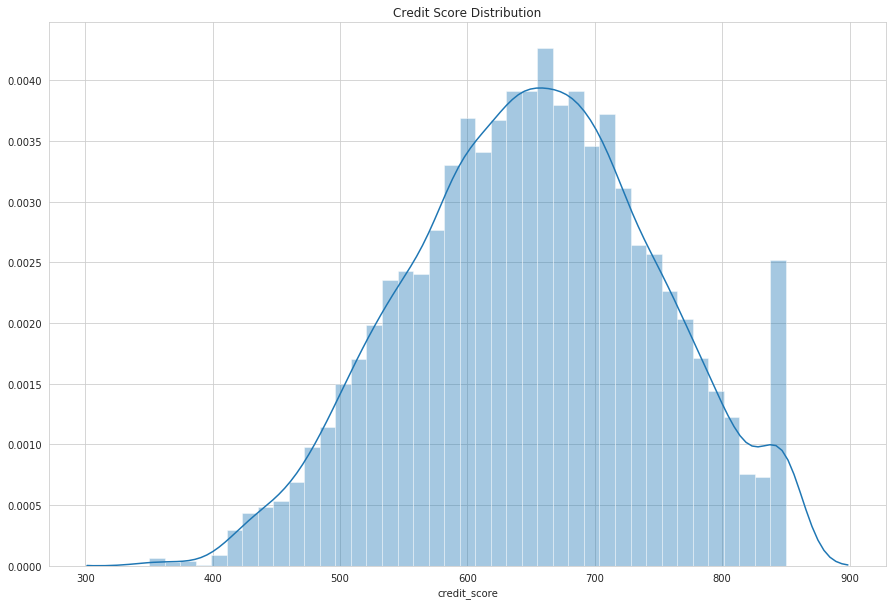

In [13]:
# plot the histogram for credit score
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)

sns.distplot(df_dkb['credit_score']).set_title('Credit Score Distribution')

[Text(0, 0, 'Austria'), Text(0, 0, 'Germany'), Text(0, 0, 'Switzerland')]

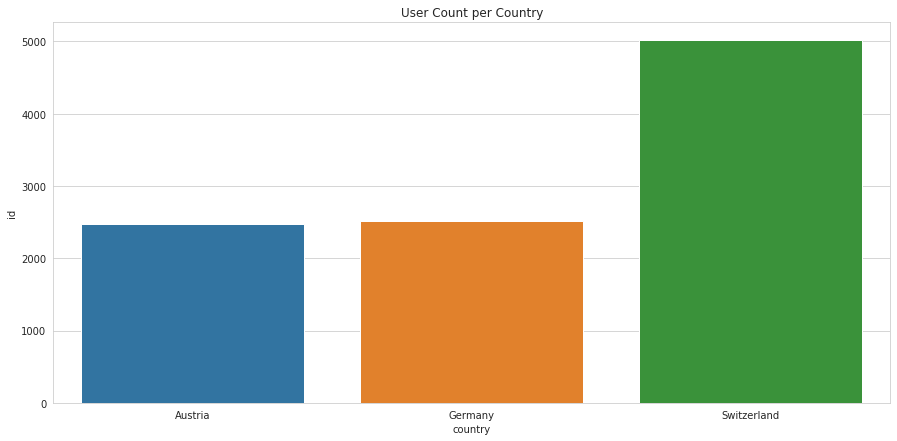

In [27]:
# plot the number of users for each country
df_dkb_grouped_by_country = df_dkb.groupby(['country']).agg({'id':'count'}).reset_index()

fig, axis = plt.subplots(1,1,figsize=(15, 7))

sns.barplot(x='country', y='id', data=df_dkb_grouped_by_country, order=df_dkb_grouped_by_country['country'].unique(), ax=axis)
axis.set_xticks(range(len(df_dkb_grouped_by_country['country'].unique())))
axis.set_title('User Count per Country')
axis.set_xticklabels(df_dkb_grouped_by_country['country'].unique(), rotation=0)

[Text(0, 0, 'f'), Text(0, 0, 'm')]

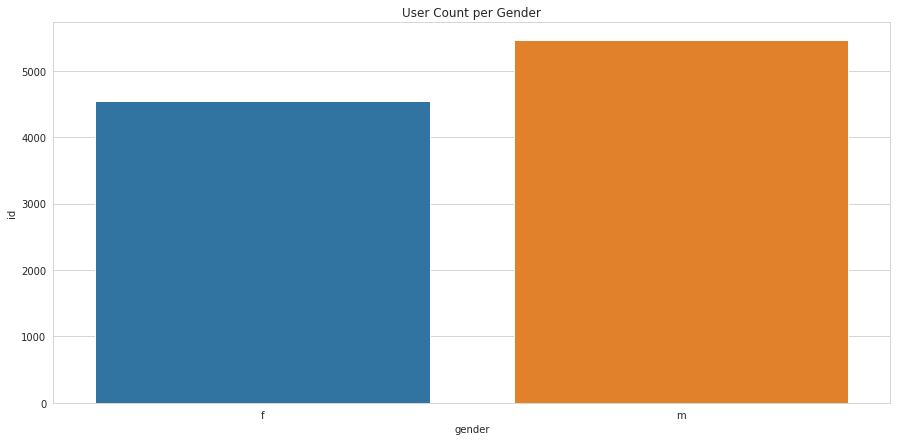

In [30]:
# plot the number of users for each gender
df_dkb_grouped_by_gender = df_dkb.groupby(['gender']).agg({'id':'count'}).reset_index()

fig, axis = plt.subplots(1,1,figsize=(15, 7))

sns.barplot(x='gender', y='id', data=df_dkb_grouped_by_gender, order=df_dkb_grouped_by_gender['gender'].unique(), ax=axis)
axis.set_xticks(range(len(df_dkb_grouped_by_gender['gender'].unique())))
axis.set_title('User Count per Gender')
axis.set_xticklabels(df_dkb_grouped_by_gender['gender'].unique(), rotation=0)

Text(0.5, 1.0, 'Age Distribution')

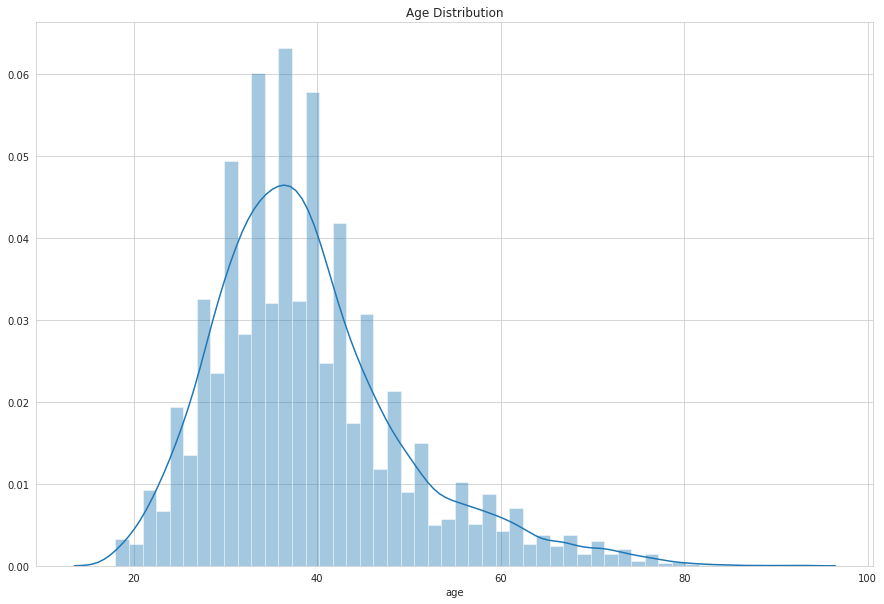

In [12]:
# plot the histogram for age
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)

sns.distplot(df_dkb['age']).set_title('Age Distribution')

[Text(0, 0, '0'),
 Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '3'),
 Text(0, 0, '4'),
 Text(0, 0, '5'),
 Text(0, 0, '6'),
 Text(0, 0, '7'),
 Text(0, 0, '8'),
 Text(0, 0, '9'),
 Text(0, 0, '10')]

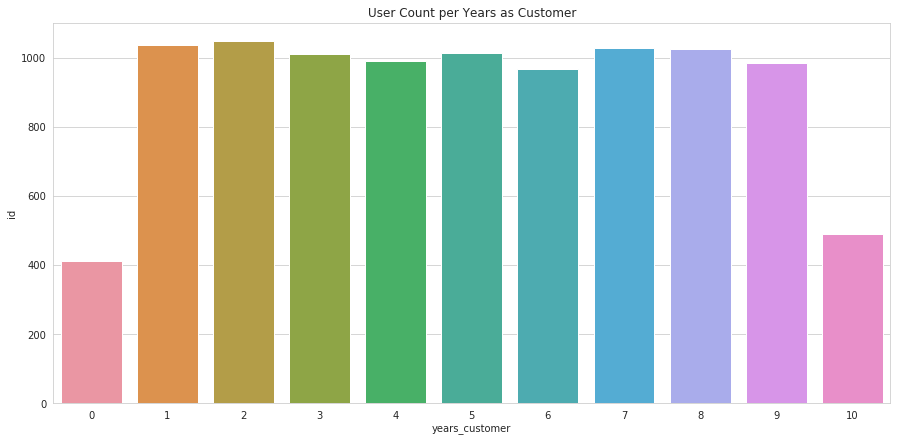

In [31]:
# plot the number of users for each years_customer
df_dkb_grouped_by_years_customer = df_dkb.groupby(['years_customer']).agg({'id':'count'}).reset_index()

fig, axis = plt.subplots(1,1,figsize=(15, 7))

sns.barplot(x='years_customer', y='id', data=df_dkb_grouped_by_years_customer, order=df_dkb_grouped_by_years_customer['years_customer'].unique(), ax=axis)
axis.set_xticks(range(len(df_dkb_grouped_by_years_customer['years_customer'].unique())))
axis.set_title('User Count per Years as Customer')
axis.set_xticklabels(df_dkb_grouped_by_years_customer['years_customer'].unique(), rotation=0)

Text(0.5, 1.0, 'Account Balance Distribution')

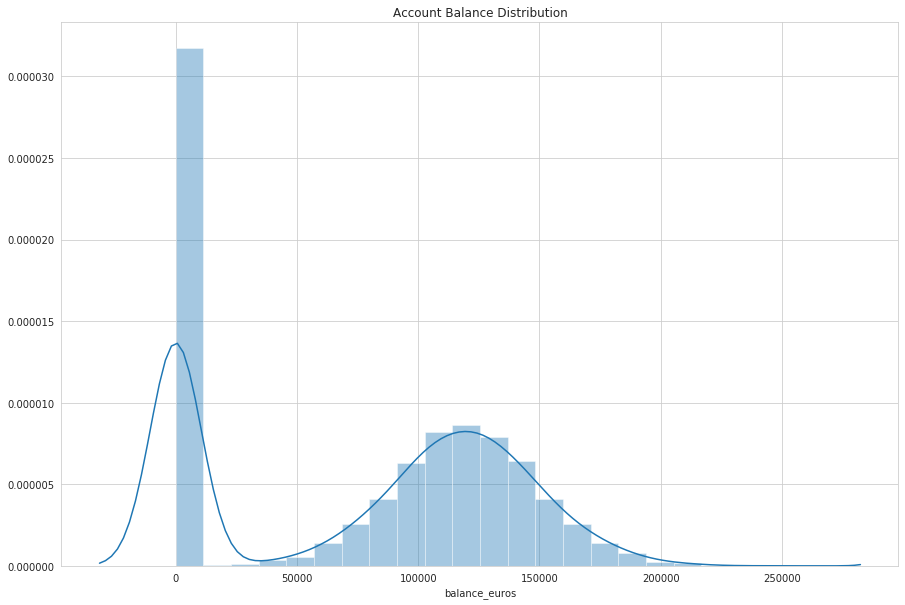

In [15]:
# plot the histogram for account balance
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)

sns.distplot(df_dkb['balance_euros']).set_title('Account Balance Distribution')

[Text(0, 0, '1'), Text(0, 0, '2'), Text(0, 0, '3'), Text(0, 0, '4')]

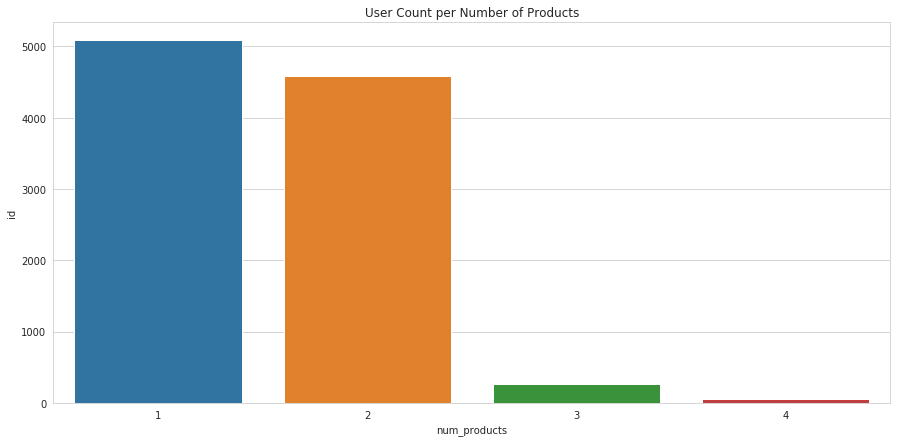

In [32]:
# plot the number of users for each num_products
df_dkb_grouped_by_num_products = df_dkb.groupby(['num_products']).agg({'id':'count'}).reset_index()

fig, axis = plt.subplots(1,1,figsize=(15, 7))

sns.barplot(x='num_products', y='id', data=df_dkb_grouped_by_num_products, order=df_dkb_grouped_by_num_products['num_products'].unique(), ax=axis)
axis.set_xticks(range(len(df_dkb_grouped_by_num_products['num_products'].unique())))
axis.set_title('User Count per Number of Products')
axis.set_xticklabels(df_dkb_grouped_by_num_products['num_products'].unique(), rotation=0)

[Text(0, 0, '0'), Text(0, 0, '1')]

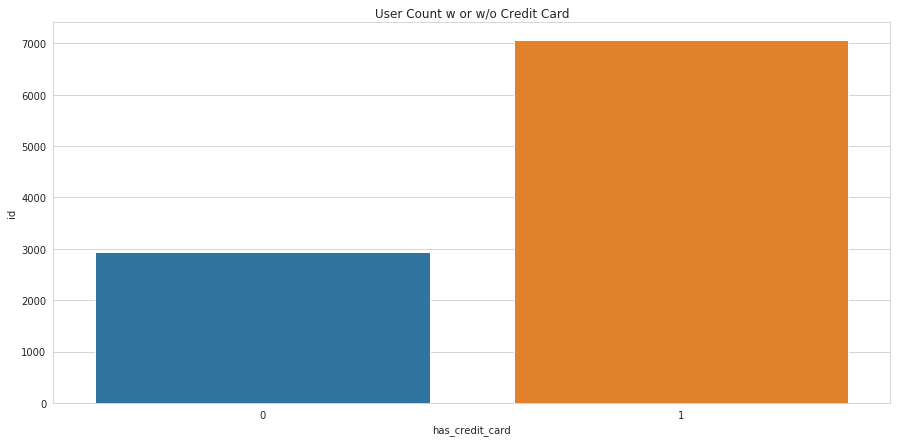

In [33]:
# plot the number of users for each type - has_credit_card
df_dkb_grouped_by_has_credit_card = df_dkb.groupby(['has_credit_card']).agg({'id':'count'}).reset_index()

fig, axis = plt.subplots(1,1,figsize=(15, 7))

sns.barplot(x='has_credit_card', y='id', data=df_dkb_grouped_by_has_credit_card, order=df_dkb_grouped_by_has_credit_card['has_credit_card'].unique(), ax=axis)
axis.set_xticks(range(len(df_dkb_grouped_by_has_credit_card['has_credit_card'].unique())))
axis.set_title('User Count w or w/o Credit Card')
axis.set_xticklabels(df_dkb_grouped_by_has_credit_card['has_credit_card'].unique(), rotation=0)

[Text(0, 0, '0'), Text(0, 0, '1')]

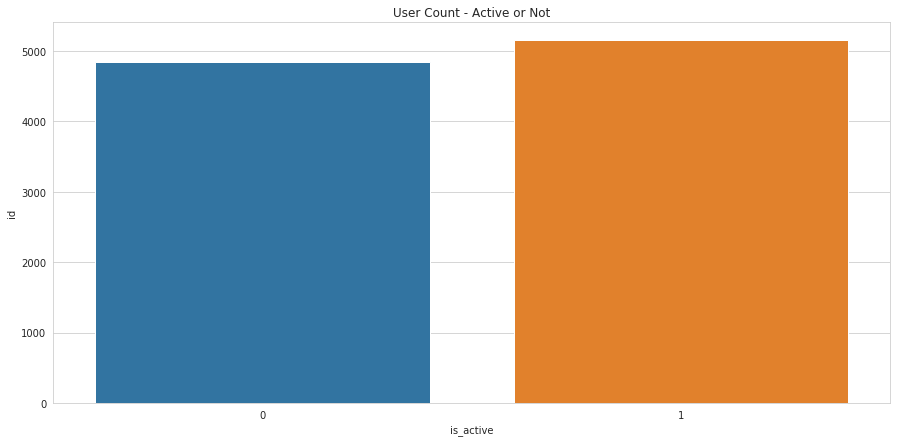

In [34]:
# plot the number of users for each type - is_active
df_dkb_grouped_by_is_active = df_dkb.groupby(['is_active']).agg({'id':'count'}).reset_index()

fig, axis = plt.subplots(1,1,figsize=(15, 7))

sns.barplot(x='is_active', y='id', data=df_dkb_grouped_by_is_active, order=df_dkb_grouped_by_is_active['is_active'].unique(), ax=axis)
axis.set_xticks(range(len(df_dkb_grouped_by_is_active['is_active'].unique())))
axis.set_title('User Count - Active or Not')
axis.set_xticklabels(df_dkb_grouped_by_is_active['is_active'].unique(), rotation=0)

Text(0.5, 1.0, 'Salary Distribution')

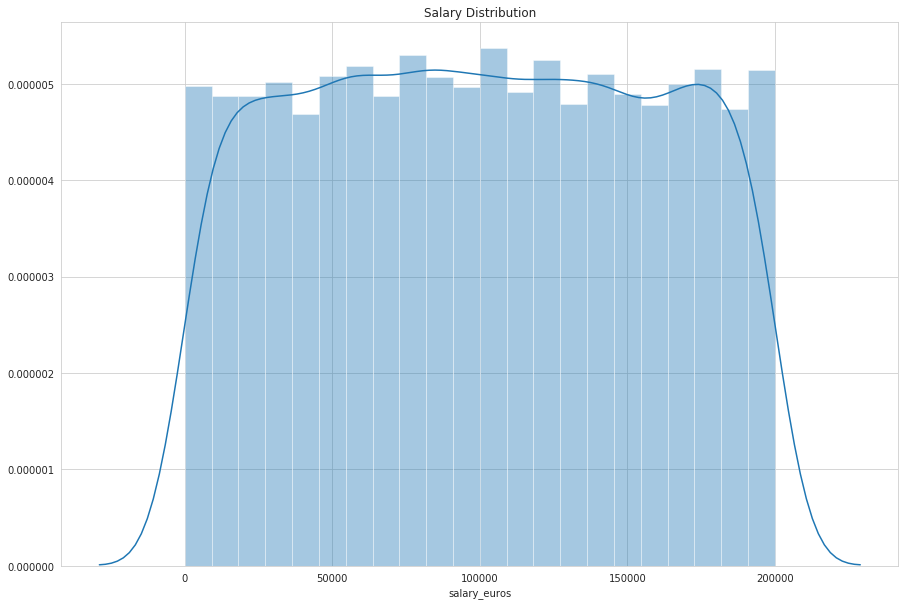

In [35]:
# plot the histogram for salary
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)

sns.distplot(df_dkb['salary_euros']).set_title('Salary Distribution')

[Text(0, 0, '0'), Text(0, 0, '1')]

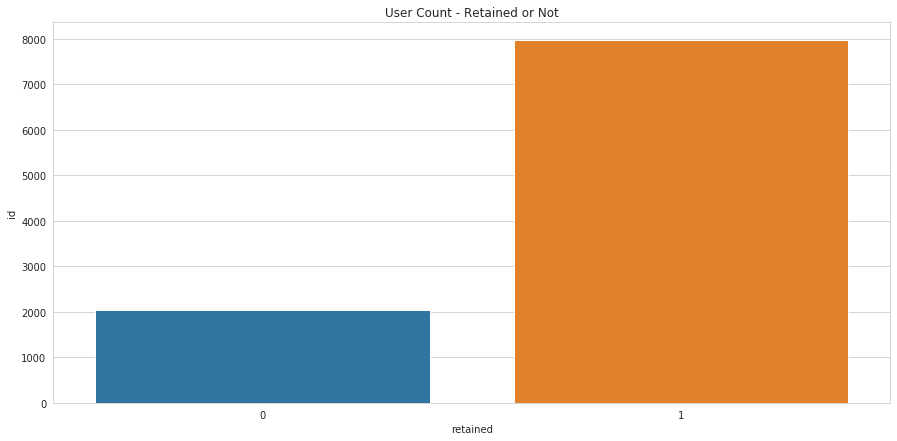

In [36]:
# plot the number of users for each type - retained
df_dkb_grouped_by_retained = df_dkb.groupby(['retained']).agg({'id':'count'}).reset_index()

fig, axis = plt.subplots(1,1,figsize=(15, 7))

sns.barplot(x='retained', y='id', data=df_dkb_grouped_by_retained, order=df_dkb_grouped_by_retained['retained'].unique(), ax=axis)
axis.set_xticks(range(len(df_dkb_grouped_by_retained['retained'].unique())))
axis.set_title('User Count - Retained or Not')
axis.set_xticklabels(df_dkb_grouped_by_retained['retained'].unique(), rotation=0)